Organic Matter Index: Measures the amount of organic matter in the soil, which is an essential component for soil fertility and structure.

pH Index: Evaluates the soil pH level, which affects nutrient availability and microbial activity in the soil.

Cation Exchange Capacity (CEC) Index: Assesses the soil's ability to retain and exchange cations, which influences nutrient availability.

Soil Texture Index: Considers the relative proportions of sand, silt, and clay particles in the soil, which affects water-holding capacity and nutrient retention.

Nutrient Index: Evaluates the soil's nutrient content, including macronutrients (nitrogen, phosphorus, potassium) and micronutrients (iron, zinc, manganese, etc.).

Water Holding Capacity Index: Measures the soil's ability to retain water, which is crucial for plant growth and drought resistance.

Soil Quality Index = (w1 * Index1 + w2 * Index2 + ... + wn * Indexn) / (w1 + w2 + ... + wn)

*****************************************************************************

### Returns per hectare = Net Income / cultivated land size
### Return on assets = Net Income / Average Total Assets
Average Total Assets = (Total Assets at the Beginning + Total Assets at the End) / 2

Total Assets : lands, buildings, equipment, livestock, crops, and other investments

### Debt-to-Asset Ratio (DAR) = Total Liabilities (total loans) / Total Assets
### environment index
### health index

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

In [11]:
# import plotly.offline as pyoff
# import chart_studio.plotly as py
# import plotly.graph_objects as go

#import chart_studio
#chart_studio.tools.set_credentials_file(username='abdeleatifi', api_key='5DuEBwbJe5DrnqoWw4l0')

In [2]:
# Define the path to your CSV file
csv_file_path = r'data_preperation/data/usda_wheat_planted_harvested_yield_soild_weatherd_priced_2014_2022.csv'

# Load the CSV file into a dataframe
df = pd.read_csv(csv_file_path)
df.head(2)

,Year,Planting_Dates,Harvesting_Dates,State,State_ANSI,Ag_District,Ag_District_Code,County,County_ANSI,Commodity,ACRES_PLANTED,ACRES_HARVESTED,YIELD_(BU/ACRE),soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close
0,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,16300,15300,73.2,22.0,0.4,1530.0,Silt loam,1746.3,0.0,286.2,5.8908,5.97,7.39,4.74,5.895
1,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CRITTENDEN,35,WHEAT,40800,37000,65.7,28.0,0.4,1590.0,Clay loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895


In [3]:
df.columns

Index(['Year', 'Planting_Dates', 'Harvesting_Dates', 'State', 'State_ANSI',
       'Ag_District', 'Ag_District_Code', 'County', 'County_ANSI', 'Commodity',
       'ACRES_PLANTED', 'ACRES_HARVESTED', 'YIELD_(BU/ACRE)', 'soil_water',
       'soil_carbon', 'soil_density', 'soil_type', 'gdd', 'ehdd', 'ecdd',
       'average_price', 'year_open', 'year_high', 'year_low', 'year_close'],
      dtype='object')

In [4]:
# Rename our columns
df = df.rename(columns={'Year' : 'year',
                        'Planting_Dates' : 'planting_date',
                        'Harvesting_Dates' : 'harvesting_date',
                        'State' : 'state',
                        'State_ANSI' : 'state_ansi',
                        'Ag_District' : 'ag_district',
                        'Ag_District_Code' : 'ag_district_code',
                        'County' : 'county',
                        'County_ANSI' : 'county_ansi',
                        'Commodity' : 'commodity',
                        'ACRES_PLANTED' : 'acres_planted', 
                        'ACRES_HARVESTED' : 'acres_harvested',
                        'YIELD_(BU/ACRE)' : 'yield'
                        })

In [5]:
df['production'] = (df['yield'] * 27.216) / 0.404686 # in Kg / Hectare
# Calculate a new column 'Loss_perc' based on columns 'Acres_Planted' and 'Acres_Harvested'
df['crop_damage'] = ((df['acres_planted'] - df['acres_harvested']) / df['acres_planted']).apply(lambda x: round(x, 2))

df['hea_index'] = 1 - df['crop_damage'] # in %

df['land_use'] = (df['acres_planted'] / 2.471).apply(lambda x: round(x, 2))  # in Hectares

In [6]:
df['harvesting_long_date'] = pd.to_datetime(df['harvesting_date'] + '-' + df['year'].astype(str), format='%d-%b-%Y')
df['planting_long_date'] = pd.to_datetime(df['planting_date'] + '-' + str(df['year'][0] - 1), format='%d-%b-%Y')

df.head(3)

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,crop_damage,hea_index,land_use,harvesting_long_date,planting_long_date
0,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,16300,15300,73.2,22.0,0.4,1530.0,Silt loam,1746.3,0.0,286.2,5.8908,5.97,7.39,4.74,5.895,4922.856733,0.06,0.94,6596.52,2014-07-02,2013-10-03
1,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CRITTENDEN,35,WHEAT,40800,37000,65.7,28.0,0.4,1590.0,Clay loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895,4418.465675,0.09,0.91,16511.53,2014-07-02,2013-10-03
2,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CROSS,37,WHEAT,16600,15400,64.8,24.0,0.4,1570.0,Silt loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895,4357.938748,0.07,0.93,6717.93,2014-07-02,2013-10-03


In [65]:
df[['soil_water', 'soil_carbon', 'soil_density', 'soil_type_index', 'gdd', 'ehdd', 'ecdd']].head(20)

,soil_water,soil_carbon,soil_density,soil_type_index,gdd,ehdd,ecdd
0,18.0,0.4,1550.0,4,2113.9,0.0,24.0
1,18.0,0.4,1520.0,4,3282.5,0.8,19.9
2,21.0,0.4,1500.0,6,0.0,0.0,0.0
3,22.0,0.4,1520.0,6,0.0,0.0,0.0
4,23.0,0.6,1510.0,6,0.0,0.0,0.0
5,20.0,0.6,1530.0,6,0.0,0.0,0.0
6,14.0,0.4,1570.0,4,1995.4,0.0,41.4
7,16.0,0.4,1560.0,4,0.0,0.0,0.0
8,15.0,0.4,1580.0,5,0.0,0.0,0.0
9,15.0,0.4,1570.0,4,0.0,0.0,0.0


In [7]:
# then let's load the csv file that contains daily (almost daily) prices from 2000 to 2023

csv_file_path = r'data_preperation/data/wheat-prices-historical-chart-data.csv'

df_price = pd.read_csv(csv_file_path)
df_price['date'] = pd.to_datetime(df_price['date'], format='%d/%m/%y')

# By merging the two DFs we will have df_merged has a column named value containing wheat the closest price to the havest date

# Sort the 'harvesting_long_date' column in ascending order
df.sort_values('harvesting_long_date', inplace=True)

# Merge the dataframes based on the closest date
df = pd.merge_asof(df, df_price, left_on='harvesting_long_date', right_on='date', direction='nearest')

# Drop unnecessary columns if needed
df.drop(['date'], axis=1, inplace=True)

df['yearly_income'] = df['production'] * (df['value'] / 27.216) # in dollars / Hectare

df.head(2)

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,crop_damage,hea_index,land_use,harvesting_long_date,planting_long_date,value,yearly_income
0,2014,12-Oct,27-Jun,GEORGIA,13,SOUTH CENTRAL,80,COLQUITT,71,WHEAT,3500,1800,41.7,18.0,0.4,1550.0,Sandy loam,2113.9,0.0,24.0,5.8908,5.97,7.39,4.74,5.895,2804.414287,0.49,0.51,1416.43,2014-06-27,2013-10-12,5.9035,608.313483
1,2014,12-Oct,27-Jun,GEORGIA,13,SOUTH CENTRAL,80,BROOKS,27,WHEAT,5100,3300,46.4,18.0,0.4,1520.0,Sandy loam,3282.5,0.8,19.9,5.8908,5.97,7.39,4.74,5.895,3120.499350,0.35,0.65,2063.94,2014-06-27,2013-10-12,5.9035,676.876393


In [8]:
df.columns

Index(['year', 'planting_date', 'harvesting_date', 'state', 'state_ansi',
       'ag_district', 'ag_district_code', 'county', 'county_ansi', 'commodity',
       'acres_planted', 'acres_harvested', 'yield', 'soil_water',
       'soil_carbon', 'soil_density', 'soil_type', 'gdd', 'ehdd', 'ecdd',
       'average_price', 'year_open', 'year_high', 'year_low', 'year_close',
       'production', 'crop_damage', 'hea_index', 'land_use',
       'harvesting_long_date', 'planting_long_date', 'value', 'yearly_income'],
      dtype='object')

In [9]:
# Clean the DataFrame

df = df[['year', 
        'harvesting_long_date', 'planting_long_date', #'planting_date', 'harvesting_date', 
        'state', 'state_ansi',
       #'ag_district', 'ag_district_code', 
        'county', 'county_ansi', #'commodity',
        'acres_planted', 'acres_harvested', #'yield', 
        'soil_water',
        'soil_carbon', 'soil_density', 'soil_type', 
        'gdd', 'ehdd', 'ecdd',
       #'average_price', 'year_open', 'year_high', 'year_low', 'year_close',
        'production', #'loss_perc',
        'hea_index', 'land_use', #'value', 
        'yearly_income'
       ]].copy()

### Dropping missing values

In [10]:
df = df.dropna().reset_index(drop=True)

print(df.shape)

(8257, 20)


# ------------------------------------------------------------------------

# Farms Clustering

## Feature engineering on our data

In [5]:
df_farm = df.groupby(['state', 'county']).size().reset_index()
df_farm.columns = ['state', 'county', 'count']

df_farm = df_farm[['state', 'county']]

In [11]:
df_farm = df[['year', 'state', 'county']]

### Environment Index

In [12]:
soil_type_order = {'Sand' : 1,
             'Loamy sand' : 2,
             'Silt' : 3,
             'Sandy loam' : 4,
             'Silt loam' : 5,
             'Loam' : 6,
             'Sandy clay loam' : 7,
             'Silty clay loam' : 8,
             'Clay loam' : 9,
             'Sandy clay' : 10,
             'Silty clay' : 11,
             'Clay' : 12}

df['soil_type_index'] = [soil_type_order[df['soil_type'][i]] for i in range(df.shape[0])]

In [17]:
df_env = df[[#'year', 'planting_date', 'harvesting_date', 'state', 'state_ansi',
            #'ag_district', 'ag_district_code', 'county', 'county_ansi', 'commodity',
            #'acres_planted', 'acres_harvested', 'yield', 
            'soil_water',
            'soil_carbon', 'soil_density', 'soil_type_index',# 'soil_type', 
            'gdd', 'ehdd', 'ecdd',
            #'average_price', 'year_open', 'year_high', 'year_low', 'year_close',
            #'harvesting_long_date', 'planting_long_date', 
            #'production', #'loss_perc',
            #'crop_health', 'land_use', #'value', 
            #'yearly_income'
            ]].copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_env_nor = scaler.fit_transform(df_env)

df_farm['env_index'] = sum(df_env_nor[:,i] for i in range(df_env_nor.shape[1])) / df_env_nor.shape[1]

C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\2049332161.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_farm['env_index'] = sum(df_env_nor[:,i] for i in range(df_env_nor.shape[1])) / df_env_nor.shape[1]


In [18]:
# Group the data by county and state
#df_farm['env_index'] = df.groupby(['state', 'county'])['env_index'].mean().reset_index()['env_index']
print(df_farm.head(5))
print()
print(df_farm.env_index.describe())

   year    state    county  env_index
0  2014  GEORGIA  COLQUITT   0.243261
1  2014  GEORGIA    BROOKS   0.266461
2  2014  GEORGIA   MADISON   0.218458
3  2014  GEORGIA      HART   0.231680
4  2014  GEORGIA  FRANKLIN   0.248770

count    8257.000000
mean        0.317013
std         0.061009
min         0.156148
25%         0.275871
50%         0.320327
75%         0.353151
max         0.583162
Name: env_index, dtype: float64


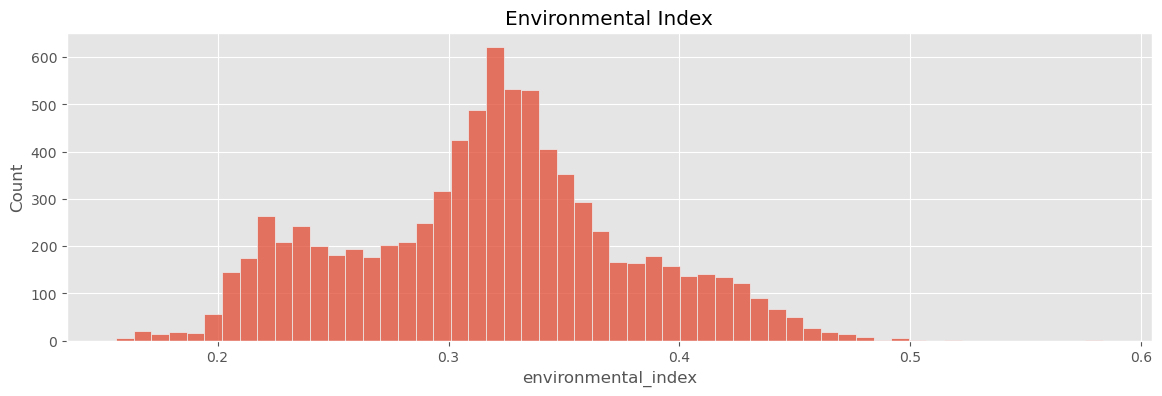

In [19]:
plt.figure(figsize=(14, 4))

sns.histplot(df_farm['env_index'])

plt.xlabel('environmental_index')
plt.title('Environmental Index')
plt.show()


c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\1836146069.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_index["clusters"] = kmeans.labels_
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\1836146069.py:7: SettingWithCopyWarning: 
A value is tryin

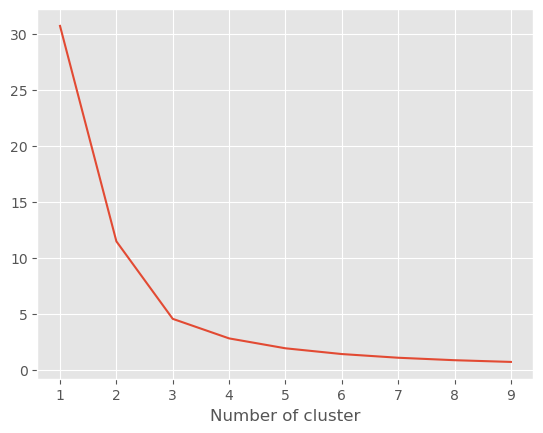

In [20]:
from sklearn.cluster import KMeans

sse={}
env_index = df_farm[['env_index']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_farm[['env_index']])
    env_index["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_farm[['env_index']])
df_farm['EnvironmentCluster'] = kmeans.predict(df_farm[['env_index']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_farm = order_cluster('EnvironmentCluster', 'env_index',df_farm,True)
df_farm.groupby('EnvironmentCluster')['env_index'].describe()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\807974361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_farm['EnvironmentCluster'] = kmeans.predict(df_farm[['env_index']])


,count,mean,std,min,25%,50%,75%,max
EnvironmentCluster,,,,,,,,
0,2177.0,0.237927,0.024894,0.156148,0.220079,0.237759,0.258041,0.280505
1,4402.0,0.323372,0.020616,0.280616,0.308100,0.323410,0.339041,0.363078
2,1678.0,0.402938,0.028130,0.363154,0.379598,0.398810,0.422037,0.583162


### Management Index <=> Crop(s) Health

In [23]:
# Group the data by county and state
df_farm['hea_index'] = df['hea_index']
#df_farm['man_index'] = df.groupby(['state', 'county'])['crop_health'].mean().reset_index()['crop_health']
print(df_farm.head(5))
print()
print(df_farm.hea_index.describe())

   year    state    county  env_index  EnvironmentCluster  hea_index
0  2014  GEORGIA  COLQUITT   0.243261                   0       0.51
1  2014  GEORGIA    BROOKS   0.266461                   0       0.65
2  2014  GEORGIA   MADISON   0.218458                   0       0.77
3  2014  GEORGIA      HART   0.231680                   0       0.75
4  2014  GEORGIA  FRANKLIN   0.248770                   0       0.58

count    8257.000000
mean        0.786499
std         0.213008
min         0.000000
25%         0.690000
50%         0.870000
75%         0.940000
max         1.000000
Name: hea_index, dtype: float64


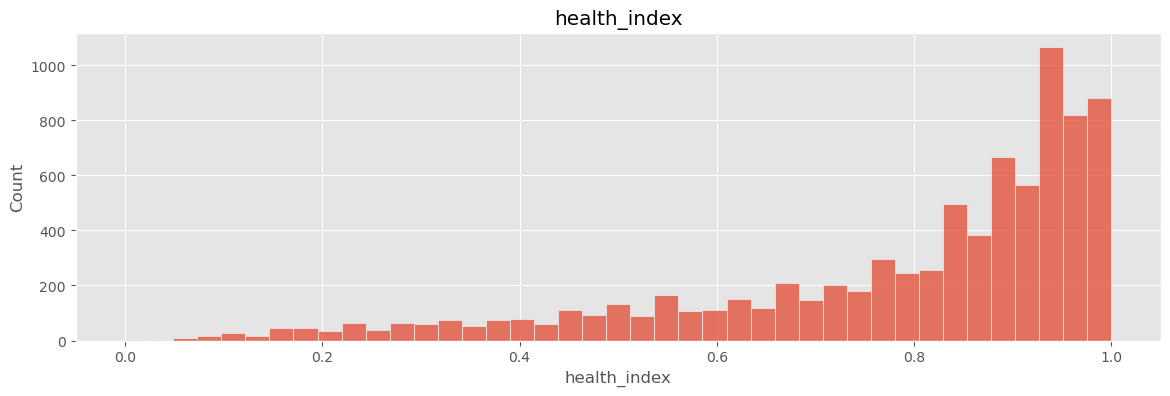

In [25]:
plt.figure(figsize=(14, 4))

sns.histplot(df_farm['hea_index'])

plt.xlabel('health_index')
plt.title('health_index')
plt.show()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\491216862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hea_index["clusters"] = kmeans.labels_
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\491216862.py:7: SettingWithCopyWarning: 
A value is trying 

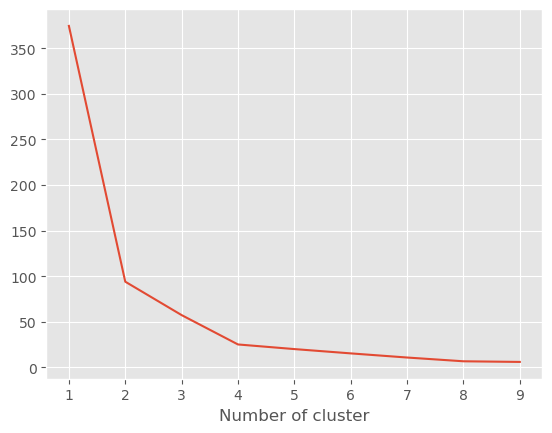

In [26]:
from sklearn.cluster import KMeans

sse={}
hea_index = df_farm[['hea_index']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(hea_index)
    hea_index["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_farm[['hea_index']])
df_farm['HealthCluster'] = kmeans.predict(df_farm[['hea_index']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_farm = order_cluster('HealthCluster', 'hea_index',df_farm,True)
df_farm.groupby('HealthCluster')['hea_index'].describe()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
HealthCluster,,,,,,,,
0,1062.0,0.338729,0.120100,0.00,0.25,0.36,0.44,0.50
1,1928.0,0.672396,0.083591,0.51,0.60,0.68,0.75,0.79
2,5267.0,0.918551,0.055036,0.80,0.88,0.93,0.96,1.00


### Production Index <=> pro_income

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_farm['pro_index'] = scaler.fit_transform(df['production'].values.reshape(-1, 1))

#df_farm['inc_index'] = df.groupby(['state', 'county'])['yearly_income'].mean().reset_index()['yearly_income']
print(df_farm.head(5))
print()
print(df_farm.pro_index.describe())

   year    state    county  env_index  EnvironmentCluster  hea_index  \
0  2014  GEORGIA  COLQUITT   0.243261                   0       0.51   
1  2014  GEORGIA    BROOKS   0.266461                   0       0.65   
2  2014  GEORGIA   MADISON   0.218458                   0       0.77   
3  2014  GEORGIA      HART   0.231680                   0       0.75   
4  2014  GEORGIA  FRANKLIN   0.248770                   0       0.58   

   HealthCluster  pro_index  
0              1   0.255446  
1              1   0.286469  
2              1   0.297030  
3              1   0.368977  
4              1   0.291089  

count    8257.000000
mean        0.361394
std         0.132612
min         0.000000
25%         0.273267
50%         0.366337
75%         0.447525
max         1.000000
Name: pro_index, dtype: float64


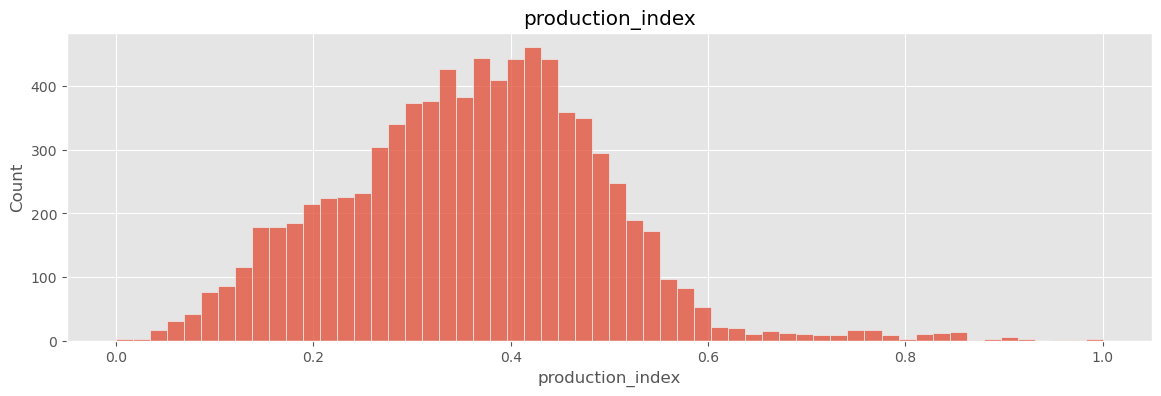

In [30]:
plt.figure(figsize=(14, 4))

sns.histplot(df_farm['pro_index'])

plt.xlabel('production_index')
plt.title('production_index')
plt.show()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\2136366023.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_index["clusters"] = kmeans.labels_
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\2136366023.py:7: SettingWithCopyWarning: 
A value is tryin

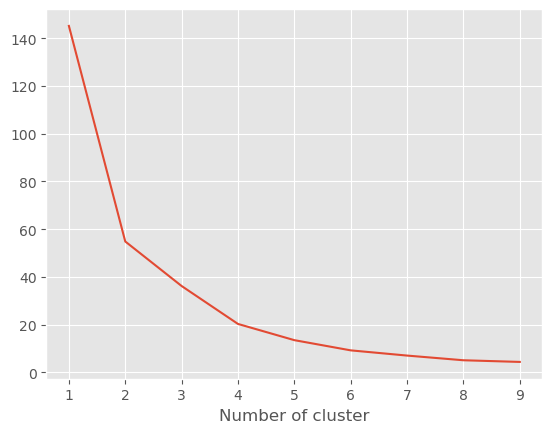

In [31]:
from sklearn.cluster import KMeans

sse={}
pro_index = df_farm[['pro_index']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pro_index)
    pro_index["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_farm[['pro_index']])
df_farm['ProdCluster'] = kmeans.predict(df_farm[['pro_index']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_farm = order_cluster('ProdCluster', 'pro_index',df_farm,True)
df_farm.groupby('ProdCluster')['pro_index'].describe()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
ProdCluster,,,,,,,,
0,2191.0,0.196862,0.058169,0.000000,0.155776,0.204620,0.246535,0.279208
1,3755.0,0.362525,0.045015,0.279868,0.324752,0.363696,0.401980,0.438284
2,2311.0,0.515545,0.083069,0.438944,0.463366,0.493069,0.535974,1.000000


### Assets Index <=> Land Use and ownership (for now ...)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_farm['ass_index'] = scaler.fit_transform(df['land_use'].values.reshape(-1, 1))
#df_farm['ass_index'] = df.groupby(['state', 'county'])['land_use'].mean().reset_index()['land_use']
print(df_farm.head(5))
print()
print(df_farm.ass_index.describe())

   year           state     county  env_index  EnvironmentCluster  hea_index  \
0  2014         GEORGIA   COLQUITT   0.243261                   0       0.51   
1  2014         GEORGIA    BULLOCH   0.233939                   0       0.77   
2  2014         GEORGIA    DECATUR   0.173473                   0       0.55   
3  2014     MISSISSIPPI   PRENTISS   0.275624                   0       0.67   
4  2014  SOUTH CAROLINA  CLARENDON   0.203368                   0       0.77   

   HealthCluster  pro_index  ProdCluster  ass_index  
0              1   0.255446            0   0.007927  
1              1   0.152475            0   0.011770  
2              1   0.273267            0   0.002642  
3              1   0.273267            0   0.002402  
4              1   0.200660            0   0.002402  

count    8257.000000
mean        0.070284
std         0.123291
min         0.000000
25%         0.006966
50%         0.018016
75%         0.064377
max         1.000000
Name: ass_index, dtype: fl

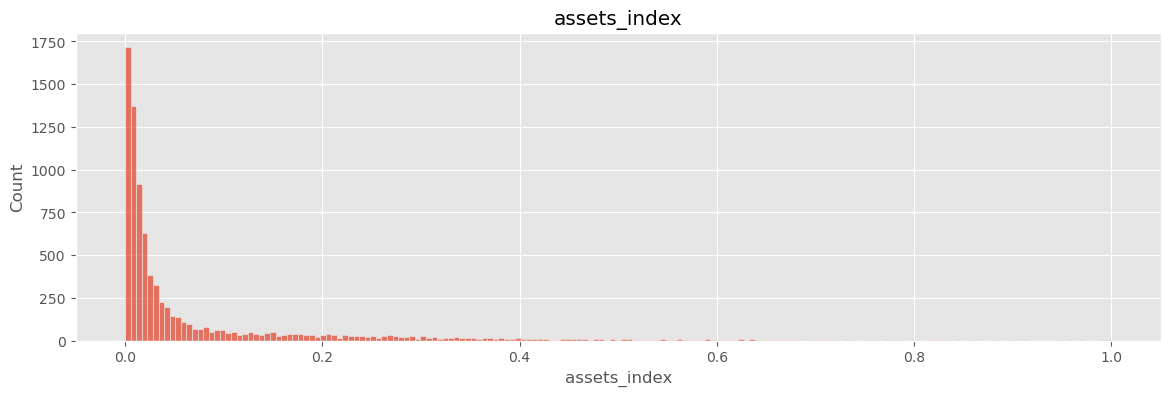

In [34]:
plt.figure(figsize=(14, 4))

sns.histplot(df_farm['ass_index'])

plt.xlabel('assets_index')
plt.title('assets_index')
plt.show()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\665475878.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_index["clusters"] = kmeans.labels_
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\665475878.py:7: SettingWithCopyWarning: 
A value is trying 

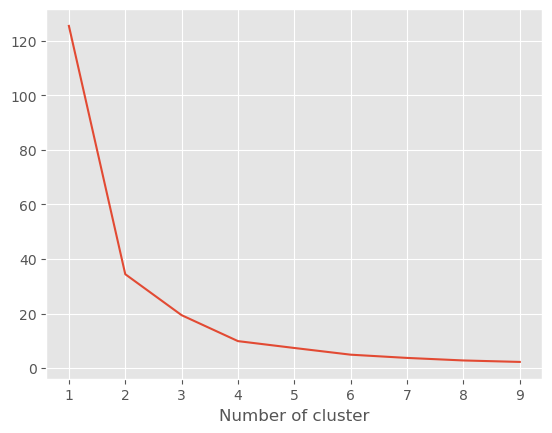

In [35]:
from sklearn.cluster import KMeans

sse={}
ass_index = df_farm[['ass_index']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ass_index)
    ass_index["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [36]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_farm[['ass_index']])
df_farm['AssetsCluster'] = kmeans.predict(df_farm[['ass_index']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_farm = order_cluster('AssetsCluster', 'ass_index',df_farm,True)
df_farm.groupby('AssetsCluster')['ass_index'].describe()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
AssetsCluster,,,,,,,,
0,6806.0,0.023025,0.025836,0.000000,0.005525,0.012971,0.029546,0.124189
1,1130.0,0.224732,0.069937,0.124429,0.164785,0.213068,0.275943,0.376651
2,321.0,0.528582,0.135272,0.379054,0.422292,0.481143,0.600048,1.000000


In [37]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, fowlkes_mallows_score, adjusted_rand_score

# Calculate the evaluation metrics
calinski_score = calinski_harabasz_score(df_farm[['ass_index']], df_farm['AssetsCluster'])
silhouette_score = silhouette_score(df_farm[['ass_index']], df_farm['AssetsCluster'])

In [38]:
calinski_score

28406.35658836978

In [39]:
silhouette_score

0.7975747000935465

### Overall Index (Clustring)

In [41]:
df_farm['OverallScore'] = df_farm['EnvironmentCluster'] + df_farm['HealthCluster'] + df_farm['ProdCluster'] + df_farm['AssetsCluster']

In [43]:
df_farm.groupby('OverallScore')['env_index','hea_index','pro_index','ass_index'].mean()

C:\Users\abdel\AppData\Local\Temp\ipykernel_10140\1290593643.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_farm.groupby('OverallScore')['env_index','hea_index','pro_index','ass_index'].mean()


,env_index,hea_index,pro_index,ass_index
OverallScore,,,,
0,0.237102,0.332545,0.190831,0.032507
1,0.273534,0.488361,0.184371,0.028951
2,0.271828,0.673801,0.272299,0.036995
3,0.304662,0.739990,0.324526,0.049787
4,0.321658,0.839481,0.385345,0.058187
5,0.347102,0.885302,0.431280,0.097876
6,0.375532,0.893545,0.487495,0.170361
7,0.386497,0.899623,0.491550,0.335525
8,0.403184,0.848182,0.523912,0.525910


In [44]:
df_farm.groupby('OverallScore')['env_index'].count()

OverallScore
0      55
1     360
2    1134
3    2000
4    2563
5    1509
6     519
7     106
8      11
Name: env_index, dtype: int64

In [45]:
df_farm['Class'] = 'Risky'
df_farm.loc[df_farm['OverallScore'] > 2,'Class'] = 'Good' 
df_farm.loc[df_farm['OverallScore'] > 5,'Class'] = 'Excellent' 

In [46]:
df_farm

,year,state,county,env_index,EnvironmentCluster,hea_index,HealthCluster,pro_index,ProdCluster,ass_index,AssetsCluster,OverallScore,Class
0,2014,GEORGIA,COLQUITT,0.243261,0,0.51,1,0.255446,0,0.007927,0,1,Risky
1,2014,GEORGIA,BULLOCH,0.233939,0,0.77,1,0.152475,0,0.011770,0,1,Risky
2,2014,GEORGIA,DECATUR,0.173473,0,0.55,1,0.273267,0,0.002642,0,1,Risky
3,2014,MISSISSIPPI,PRENTISS,0.275624,0,0.67,1,0.273267,0,0.002402,0,1,Risky
4,2014,SOUTH CAROLINA,CLARENDON,0.203368,0,0.77,1,0.200660,0,0.002402,0,1,Risky
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,2019,INDIANA,ST. JOSEPH,0.381359,2,0.43,0,0.537294,2,0.564016,2,6,Excellent
8253,2019,NEBRASKA,NEMAHA,0.425608,2,0.39,0,0.475248,2,0.428297,2,6,Excellent
8254,2019,MICHIGAN,KENT,0.377787,2,0.17,0,0.706271,2,0.626471,2,6,Excellent
8255,2019,MICHIGAN,JACKSON,0.385821,2,0.20,0,0.574257,2,0.652895,2,6,Excellent


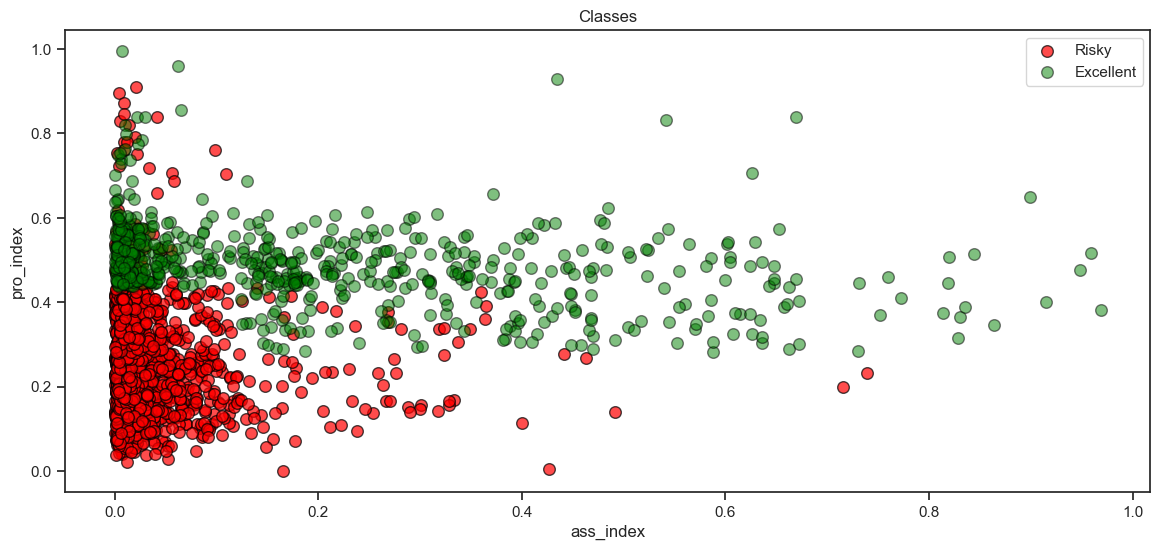

In [63]:
tx_graph = df_farm

plt.figure(figsize=(14, 6))
xaxis = 'ass_index'
yaxis = 'pro_index'

sns.scatterplot(
    x=tx_graph.query("Class == 'Risky'")[xaxis],
    y=tx_graph.query("Class == 'Risky'")[yaxis],
    color='red',
    alpha=0.7,
    label='Risky',
    edgecolor='black',
    linewidth=1,
    s=70
)



sns.scatterplot(
    x=tx_graph.query("Class == 'Excellent'")[xaxis],
    y=tx_graph.query("Class == 'Excellent'")[yaxis],
    color='green',
    alpha=0.5,
    label='Excellent',
    edgecolor='black',
    linewidth=1,
    s=70
)

plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title('Classes')
plt.legend()
plt.show()

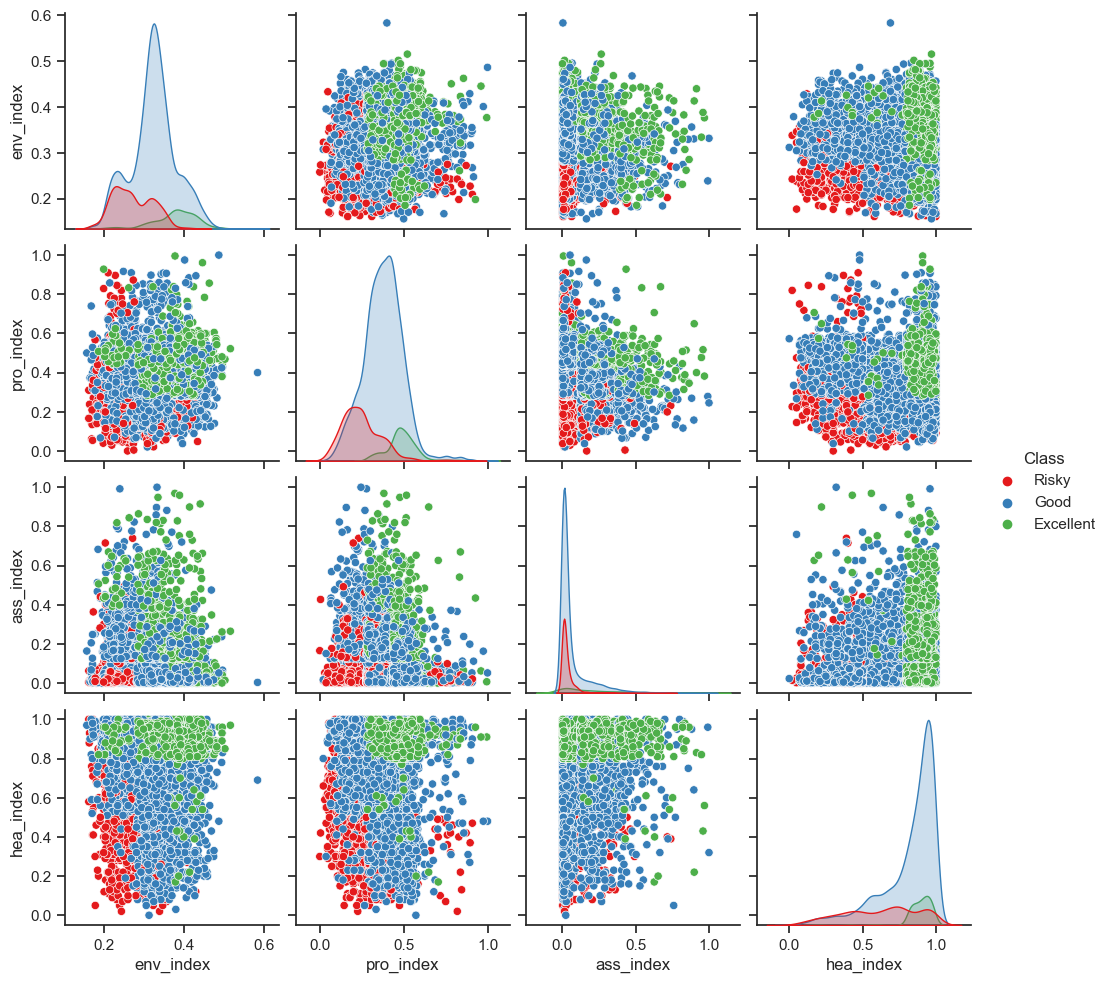

In [50]:
import seaborn as sns

# Select the features for scatter matrix visualization
selected_features = ['env_index', 'pro_index', 'ass_index', 'hea_index', 'Class']

# Create a DataFrame with only the selected features
selected_data = df_farm[selected_features]

# Plot the scatter matrix with different colors for each feature
sns.set(style='ticks')
sns.pairplot(selected_data, hue='Class', palette='Set1')